<a href="https://colab.research.google.com/github/srikarthadaka/data_science/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded=files.upload()

Saving footfalls (1).csv to footfalls (1).csv


In [4]:
data=pd.read_csv("footfalls (1).csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [6]:
data.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


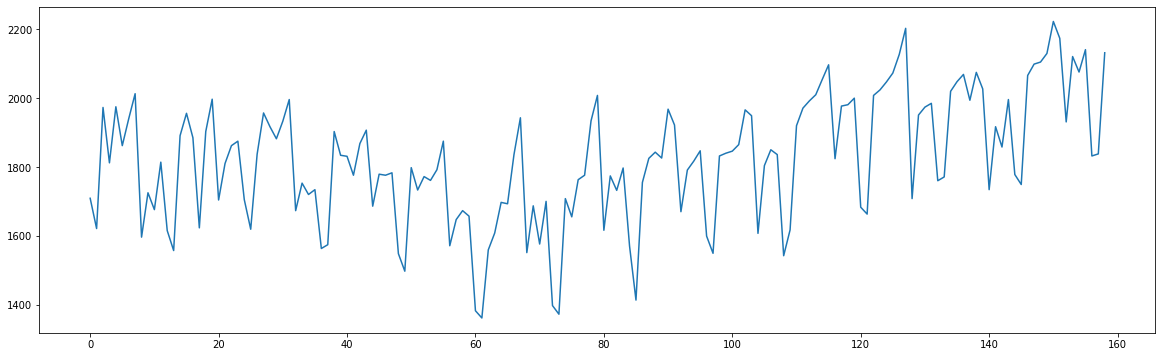

In [53]:
plt.figure(figsize=(20,6))
data.Footfalls.plot()

In [8]:
data["Date"] = pd.to_datetime(data.Month,format="%b-%y")
#look for c standard format codes
data["month"] = data.Date.dt.strftime("%b") # month extraction
data["year"] = data.Date.dt.strftime("%Y") # year extraction
#data["Day"] = data.Date.dt.strftime("%d") # Day extraction
#data["wkday"] = data.Date.dt.strftime("%A") # weekday extraction

In [9]:
data.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991


In [10]:
heatmap_y_month = pd.pivot_table(data=data,values="Footfalls",index="year",columns="month",aggfunc="mean",fill_value=0)
heatmap_y_month


month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1991,1812,2013,1814,1621,1709,1940,1862,1973,1975,1676,1725,1596
1992,1956,1997,1875,1557,1615,1903,1623,1891,1885,1862,1810,1704
1993,1957,1996,1734,1619,1705,1933,1882,1837,1917,1720,1753,1673
1994,1834,1907,1783,1574,1563,1868,1776,1903,1831,1776,1779,1686
1995,1733,1875,1657,1497,1548,1792,1761,1798,1772,1673,1647,1571
1996,1608,1943,1700,1361,1382,1836,1693,1559,1697,1576,1687,1551
1997,1655,2008,1797,1372,1397,1934,1776,1708,1763,1732,1774,1616
1998,1825,1922,1847,1413,1570,1968,1826,1755,1843,1817,1791,1670
1999,1840,1949,1836,1549,1599,1966,1865,1832,1846,1850,1804,1607


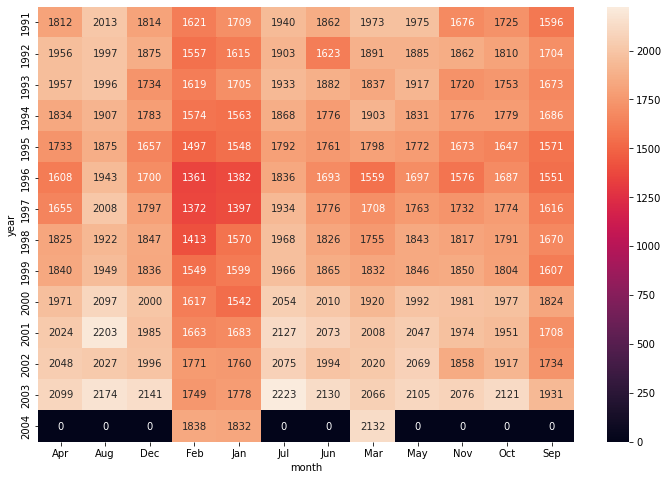

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

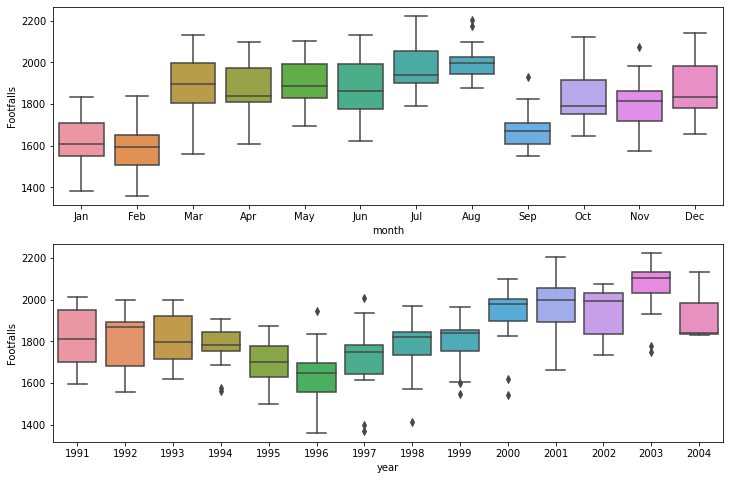

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(211)
sns.boxplot(x="month",y="Footfalls",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Footfalls",data=data)

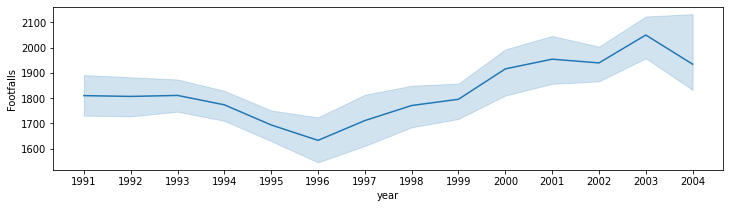

In [13]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Footfalls",data=data)

In [15]:
train_data = data.head(147)
test_data = data.tail(12)

In [16]:
test_data['t']

147    148
148    149
149    150
150    151
151    152
152    153
153    154
154    155
155    156
156    157
157    158
158    159
Name: t, dtype: int64

In [17]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Footfalls~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))

rmse_linear = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_linear))**2))
rmse_linear

209.92559265462572

In [18]:
#Exponential

Exp = smf.ols('log_footfalls~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))

rmse_Exp = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

217.05263569546594

In [19]:
#Quadratic 

Quad = smf.ols('Footfalls~t+t_square',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_square"]]))

rmse_Quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_Quad))**2))
rmse_Quad

137.15462741356137

In [20]:
#Additive seasonality 

add_sea = smf.ols('Footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))

rmse_add_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea))**2))
rmse_add_sea

264.6643900568775

In [21]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))

rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

50.607245841416486

In [23]:
##Multiplicative Seasonality

Mult_sea = smf.ols('log_footfalls~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mult_sea.predict(test_data))

rmse_Mult_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

268.1970325266239

In [24]:
#Multiplicative Additive Seasonality 

Mult_Add_sea = smf.ols('log_footfalls~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_add_sea = pd.Series(Mult_Add_sea.predict(test_data))

rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test_data['Footfalls'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

172.76726787490355

In [26]:
#Compare the results 

models_data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
               "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(models_data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,50.607246
2,rmse_Quad,137.154627
6,rmse_Mult_add_sea,172.767268
0,rmse_linear,209.925593
1,rmse_Exp,217.052636
3,rmse_add_sea,264.664390
5,rmse_Mult_sea,268.197033


# Predict New Data

In [27]:
from google.colab import files
uploaded=files.upload()

Saving Predict_new.csv to Predict_new.csv


In [28]:
predict_data = pd.read_csv("Predict_new.csv")
predict_data

In [29]:
#Build the model on entire data set
model_full = smf.ols('Footfalls~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=data).fit()

In [30]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     2213.628216
1     2252.669534
2     2219.210851
3     2331.668836
4     2384.626820
5     2059.418138
6     2206.876122
7     2204.750773
8     2256.708757
9     2028.471300
10    1999.332467
11    2308.270556
dtype: float64

In [31]:
predict_data["forecasted_Footfalls"] = pd.Series(pred_new)
predict_data

,Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,forecasted_Footfalls
0,04-Apr,0,0,0,1,0,0,0,0,0,0,0,0,160,25600,2213.628216
1,04-May,0,0,0,0,1,0,0,0,0,0,0,0,161,25921,2252.669534
2,04-Jun,0,0,0,0,0,1,0,0,0,0,0,0,162,26244,2219.210851
3,04-Jul,0,0,0,0,0,0,1,0,0,0,0,0,163,26569,2331.668836
4,04-Aug,0,0,0,0,0,0,0,1,0,0,0,0,164,26896,2384.626820
5,04-Sep,0,0,0,0,0,0,0,0,1,0,0,0,165,27225,2059.418138
6,04-Oct,0,0,0,0,0,0,0,0,0,1,0,0,166,27556,2206.876122
7,04-Nov,0,0,0,0,0,0,0,0,0,0,1,0,167,27889,2204.750773
8,04-Dec,0,0,0,0,0,0,0,0,0,0,0,1,168,28224,2256.708757
9,05-Jan,1,0,0,0,0,0,0,0,0,0,0,0,169,28561,2028.471300


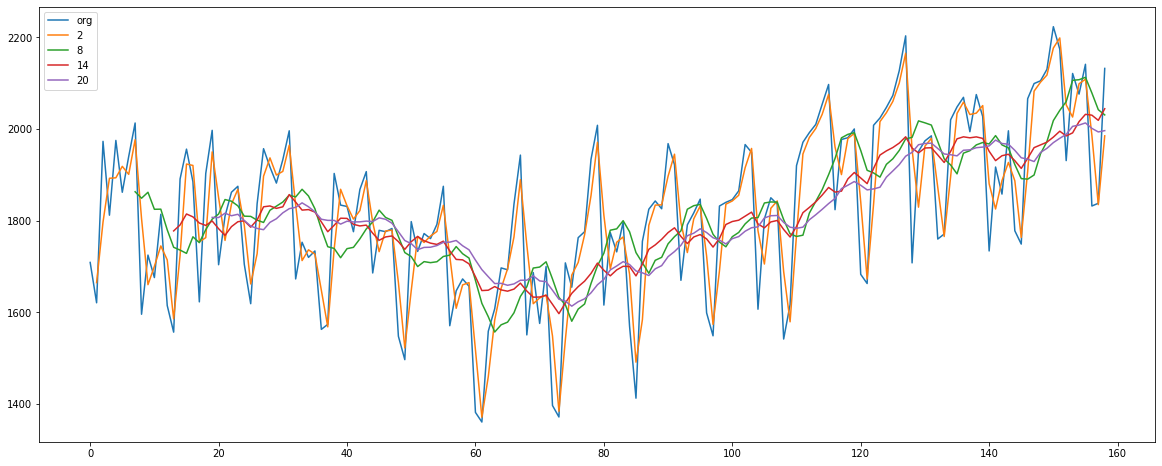

In [34]:
#Moving Average

plt.figure(figsize=(20,8))
data.Footfalls.plot(label="org")
for i in range(2,24,6):
    data["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

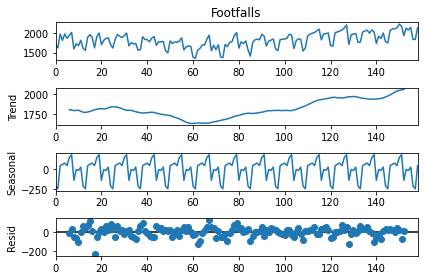

In [39]:
#Time Series decomposition plot

decompose_ts_add = seasonal_decompose(data.Footfalls,period=12)
decompose_ts_add.plot()
plt.show()

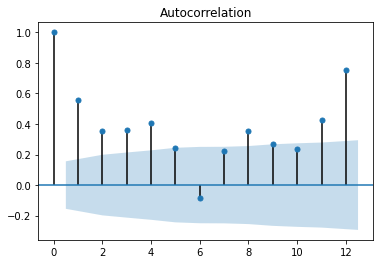

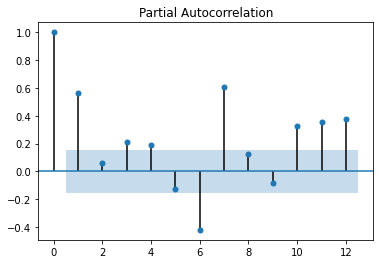

In [43]:
#ACF plots and PACF plots

import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data.Footfalls,lags=12)
tsa_plots.plot_pacf(data.Footfalls,lags=12)
plt.show()

In [45]:
#Evaluation Metric MAPE

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [46]:
#Simple Exponential Method

ses_model = SimpleExpSmoothing(train_data["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_ses,test_data.Footfalls) 

8.490637057828364

In [47]:
# Holt method 

hw_model = Holt(train_data["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hw,test_data.Footfalls) 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-47-aaddd90edd4a>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(train_data["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


7.546249229496066

In [48]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(train_data["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_add,test_data.Footfalls)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


2.6748196958856236

In [49]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(train_data["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_add,test_data.Footfalls)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


4.238666032273202

In [50]:
# Final Model by combining train and test

hwe_model_add_add = ExponentialSmoothing(data["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [51]:
#Forecasting for next 10 time periods

hwe_model_add_add.forecast(10)

159    2152.457473
160    2165.602422
161    2162.802663
162    2247.700393
163    2244.034122
164    1952.378271
165    2142.193951
166    2117.779535
167    2183.834006
168    1909.820546
dtype: float64